# VVV Machine Analysis Samples size 2.5k + SMOTE

In [1]:
% matplotlib inline

import time
import pandas as pd

from IPython import display as d

import seaborn as sns
sns.set()

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE

from libs import container
from libs.experiment import (
    WithAnotherExperiment, KFoldExperiment, roc, 
    discretize_classes, clean_features)

## 1. Load Data

In [2]:
start = time.time()

path = "/home/data/carpyncho/stored/samples/2.5k/"
data = container.read(path)

print("Removing b220...")
del data["b220"]

Loading '/home/data/carpyncho/stored/samples/2.5k/b220_sample2.5k.npy'...
Loading '/home/data/carpyncho/stored/samples/2.5k/b264_sample2.5k.npy'...
Loading '/home/data/carpyncho/stored/samples/2.5k/b278_sample2.5k.npy'...
Loading '/home/data/carpyncho/stored/samples/2.5k/b263_sample2.5k.npy'...
Loading '/home/data/carpyncho/stored/samples/2.5k/b261_sample2.5k.npy'...
Loading '/home/data/carpyncho/stored/samples/2.5k/b262_sample2.5k.npy'...
Removing b220...


##  2. Preprocess

### 2.1. Discretize the classes

In [3]:
data, classes, sclasses = discretize_classes(data)
d.display(d.Markdown("**Classes**"))
d.display(classes)

d.display(d.Markdown("----"))
d.display(d.Markdown("**Simplified Classes**"))
d.display(sclasses)

**Classes**

{'': 0,
 'Cep-1': 1,
 'Cep-F': 2,
 'LPV-Mira': 3,
 'LPV-OSARG': 4,
 'LPV-SRV': 5,
 'RRLyr-RRab': 6,
 'RRLyr-RRc': 7,
 'RRLyr-RRd': 8,
 'T2Cep-BLHer': 9,
 'T2Cep-RVTau': 10,
 'T2Cep-WVir': 11}

----

**Simplified Classes**

{'': 0, 'Cep': 1, 'LPV': 2, 'RRLyr': 3, 'T2Cep': 4}

### 2.2. Removes all low-variance and "bad" features

In [4]:
X_columns = clean_features(data, "b278")
print("Total features:", X_columns.size)

('Total features:', 54)


### 2.3. Selected features

In [5]:
X_columns.values

array(['cnt', 'AMP', 'Amplitude', 'AndersonDarling', 'Autocor_length',
       'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3',
       'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2',
       'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0',
       'Freq3_harmonics_amplitude_1', 'Freq3_harmonics_amplitude_2',
       'Freq3_harmonics_amplitude_3', 'Freq3_harmonics_rel_phase_1',
       'Freq3_harmonics_rel_phase_2', 'Freq

In [6]:
%%html
<div style="background-color: #FFFF6F; color:#525200">
    <h2 style="padding: 10px; text-align:center">3. b278 Vs Itself (with 10 kfolds)</h2>
</div>

### 3.1. SVM - Linear

Execute a SVM with a linear kernel. All the default parameters are documented here: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [7]:
svc_linear = KFoldExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=sclasses, sampler=SMOTE(),
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time svc_linear = svc_linear("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.97      0.88      0.92      2500
        3.0       0.55      0.83      0.66       424

avg / total       0.91      0.88      0.89      2924

--------------------------------------------------------------------------------
CPU times: user 1min 1s, sys: 152 ms, total: 1min 2s
Wall time: 1min 2s


## 3.2. SVM - Polynomic

Execute a **SVM** with a **polynomic kernel**. All the default parameters are documented here: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [8]:
svc_poly = KFoldExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=sclasses, sampler=SMOTE(),
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time svc_poly= svc_poly("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.94      0.96      0.95      2500
        3.0       0.75      0.67      0.71       424

avg / total       0.92      0.92      0.92      2924

--------------------------------------------------------------------------------
CPU times: user 49.1 s, sys: 40 ms, total: 49.1 s
Wall time: 49.1 s


### 3.3. Random Forest

Execute a **Random Forest** with **500 c45** trees. All the default parameters are documented here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [9]:
rf = KFoldExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls", sampler=SMOTE())
%time rf = rf("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.96      0.97      0.96      2500
        3.0       0.83      0.73      0.78       424

avg / total       0.94      0.94      0.94      2924

--------------------------------------------------------------------------------
CPU times: user 2min 58s, sys: 236 ms, total: 2min 58s
Wall time: 2min 58s


### 3.4. KNN

KNN with **3** neightbors ad weights determined by the **distance**. Docs: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [10]:
knn = KFoldExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls", sampler=SMOTE())
%time knn = knn("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.97      0.80      0.88      2500
        3.0       0.42      0.86      0.57       424

avg / total       0.89      0.81      0.83      2924

--------------------------------------------------------------------------------
CPU times: user 5.08 s, sys: 4 ms, total: 5.08 s
Wall time: 5.08 s


### 3.5. Results

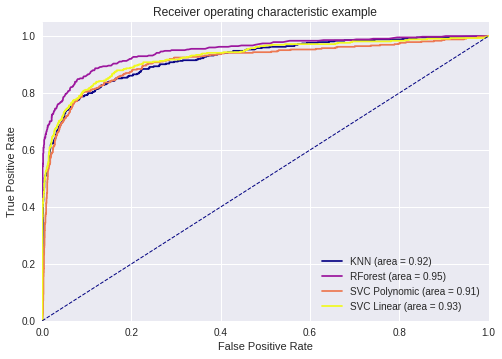

In [11]:
roc({"KNN": knn, "RForest": rf, 
     "SVC Linear": svc_linear,
     "SVC Polynomic": svc_poly})

----

In [12]:
%%html
<div style="background-color: #FFFF6F; color:#525200">
    <h2 style="padding: 10px; text-align:center">4. b261 Vs. All </h2>
</div>

### 4.1. SVM - Linear

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.95      0.96      2500
          3       0.67      0.80      0.73       297

avg / total       0.94      0.94      0.94      2797

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.95      0.97      2500
          3       0.69      0.83      0.75       308

avg / total       0.95      0.94      0.94      2808

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.95      0.93      0.94      2500
          3       0.62      0.73      0.67       424

avg / total       0.90      0.90      0.90      2924

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

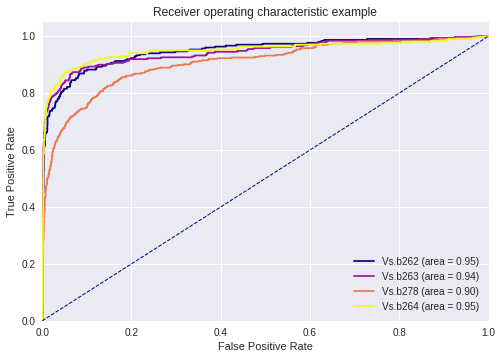

CPU times: user 19.4 s, sys: 47.9 ms, total: 19.5 s
Wall time: 19.5 s


In [13]:
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=sclasses, sampler=SMOTE(),
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_linear("b261"))

### 4.2. SVM - Polynomic

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.96      0.98      0.97      2500
          3       0.81      0.69      0.75       297

avg / total       0.95      0.95      0.95      2797

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      2500
          3       0.88      0.70      0.78       308

avg / total       0.96      0.96      0.96      2808

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.93      0.98      0.96      2500
          3       0.85      0.56      0.68       424

avg / total       0.92      0.92      0.92      2924

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

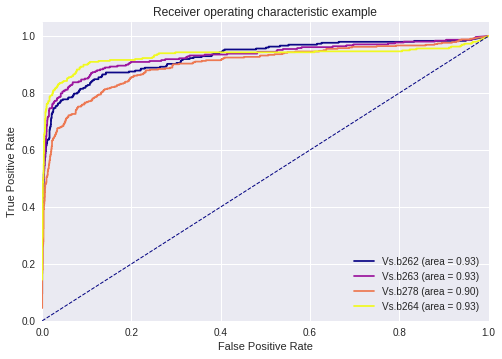

CPU times: user 19.6 s, sys: 156 ms, total: 19.8 s
Wall time: 19.7 s


In [14]:
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=sclasses, sampler=SMOTE(),
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_poly("b261"))

### 4.3. Random Forest

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      2500
          3       0.99      0.70      0.82       297

avg / total       0.97      0.97      0.96      2797

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.98      0.98      2500
          3       0.83      0.78      0.80       308

avg / total       0.96      0.96      0.96      2808

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.96      0.97      0.96      2500
          3       0.82      0.73      0.77       424

avg / total       0.94      0.94      0.94      2924

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

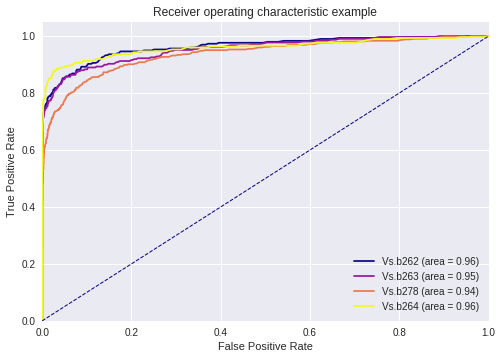

CPU times: user 1min 13s, sys: 288 ms, total: 1min 14s
Wall time: 1min 14s


In [15]:
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), sampler=SMOTE(),
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(rf("b261"))

### 4.4. KNN

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.86      0.92      2500
          3       0.43      0.88      0.57       297

avg / total       0.92      0.86      0.88      2797

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.88      0.93      2500
          3       0.46      0.85      0.60       308

avg / total       0.92      0.88      0.89      2808

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.86      0.91      2500
          3       0.50      0.82      0.62       424

avg / total       0.90      0.85      0.87      2924

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

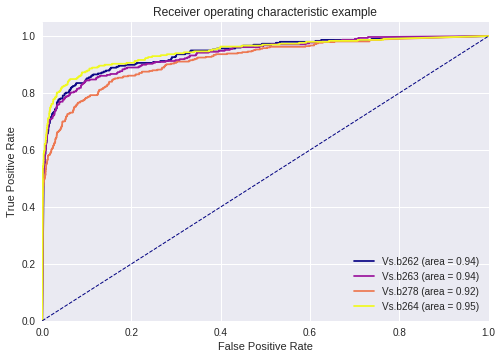

CPU times: user 14.1 s, sys: 120 ms, total: 14.2 s
Wall time: 14 s


In [16]:
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), sampler=SMOTE(),
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(knn("b261"))

In [17]:
%%html
<div style="background-color: #FFFF6F; color:#525200">
    <h2 style="padding: 10px; text-align:center">5. b278 Vs. All </h2>
</div>

### 5.1. SVM - Linear

b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.89      0.94      2500
          3       0.49      0.87      0.63       297

avg / total       0.93      0.89      0.90      2797

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.92      0.95      2500
          3       0.58      0.88      0.70       308

avg / total       0.94      0.92      0.92      2808

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.99      0.89      0.94      2500
          3       0.42      0.93      0.58       222

avg / total       0.95      0.89      0.91      2722

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

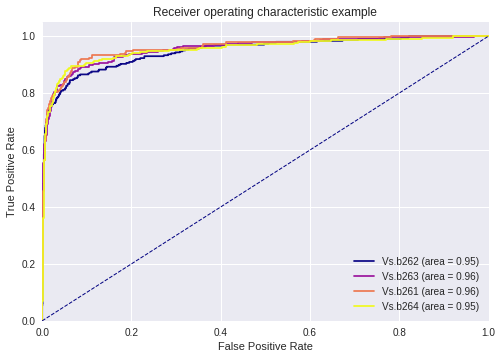

CPU times: user 31.1 s, sys: 188 ms, total: 31.3 s
Wall time: 31.2 s


In [18]:
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=sclasses, sampler=SMOTE(),
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_linear("b278"))

### 5.2. SVM - Polynomic

b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.96      0.96      2500
          3       0.68      0.76      0.72       297

avg / total       0.94      0.94      0.94      2797

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      2500
          3       0.73      0.75      0.74       308

avg / total       0.94      0.94      0.94      2808

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.99      0.95      0.97      2500
          3       0.58      0.84      0.69       222

avg / total       0.95      0.94      0.94      2722

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

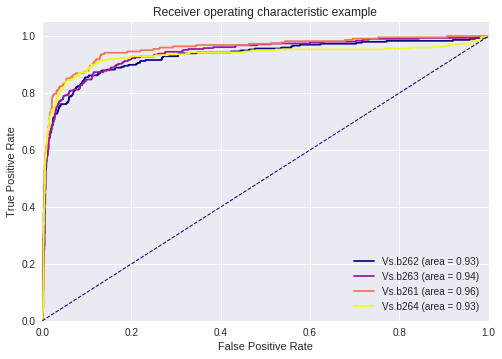

CPU times: user 24.9 s, sys: 152 ms, total: 25 s
Wall time: 24.9 s


In [19]:
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=sclasses, sampler=SMOTE(),
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_poly("b278"))

### 5.3. Random Forest

b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.95      0.96      2500
          3       0.66      0.86      0.75       297

avg / total       0.95      0.94      0.94      2797

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.93      0.95      2500
          3       0.59      0.85      0.69       308

avg / total       0.94      0.92      0.92      2808

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.99      0.98      0.98      2500
          3       0.78      0.83      0.81       222

avg / total       0.97      0.97      0.97      2722

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

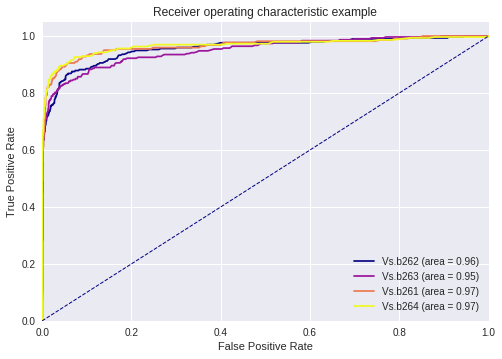

CPU times: user 1min 19s, sys: 253 ms, total: 1min 19s
Wall time: 1min 19s


In [20]:
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), sampler=SMOTE(),
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(rf("b278"))

### 5.4. KNN

b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      0.81      0.89      2500
          3       0.36      0.91      0.52       297

avg / total       0.92      0.82      0.85      2797

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.80      0.88      2500
          3       0.35      0.86      0.50       308

avg / total       0.91      0.81      0.84      2808

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.99      0.78      0.87      2500
          3       0.27      0.92      0.42       222

avg / total       0.93      0.79      0.84      2722

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

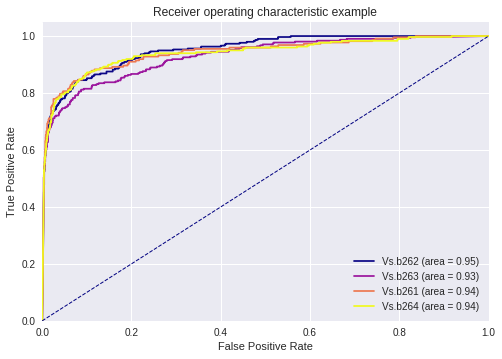

CPU times: user 14 s, sys: 112 ms, total: 14.1 s
Wall time: 14 s


In [21]:
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), sampler=SMOTE(),
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(knn("b278"))

In [22]:
%%html
<div style="background-color: #FFFF6F; color:#525200">
    <h2 style="padding: 10px; text-align:center">6. b278+b261 Vs. All </h2>
</div>

### 6.1. SVM - Linear

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.92      0.95      2500
          3       0.57      0.87      0.69       297

avg / total       0.94      0.92      0.92      2797

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.94      0.96      2500
          3       0.63      0.87      0.73       308

avg / total       0.94      0.93      0.93      2808

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.99      0.94      0.96      2500
          3       0.63      0.89      0.74       298

avg / total       0.95      0.93      0.94      2798

--------------------------------------------------------------------------------


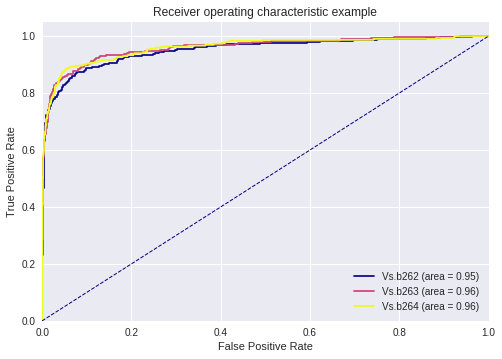

CPU times: user 1min 29s, sys: 744 ms, total: 1min 30s
Wall time: 1min 30s


In [23]:
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=sclasses, sampler=SMOTE(),
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_linear(["b278", "b261"]))

### 6.2. SVM - Polynomic

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.96      0.97      2500
          3       0.71      0.75      0.73       297

avg / total       0.94      0.94      0.94      2797

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      2500
          3       0.78      0.76      0.77       308

avg / total       0.95      0.95      0.95      2808

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      2500
          3       0.79      0.79      0.79       298

avg / total       0.96      0.96      0.96      2798

--------------------------------------------------------------------------------


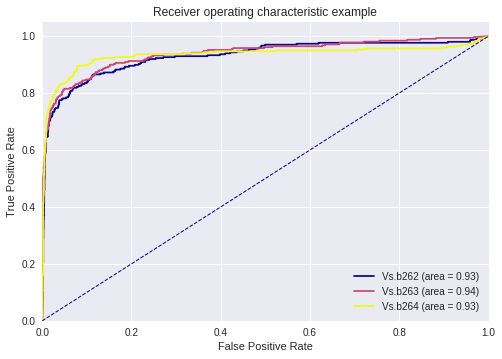

CPU times: user 1min 17s, sys: 955 ms, total: 1min 18s
Wall time: 1min 18s


In [24]:
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=sclasses, sampler=SMOTE(),
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_poly(["b278", "b261"]))

### 6.3. Random Forest

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      2500
          3       0.84      0.79      0.82       297

avg / total       0.96      0.96      0.96      2797

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.97      0.97      2500
          3       0.75      0.82      0.78       308

avg / total       0.95      0.95      0.95      2808

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      2500
          3       0.88      0.86      0.87       298

avg / total       0.97      0.97      0.97      2798

--------------------------------------------------------------------------------


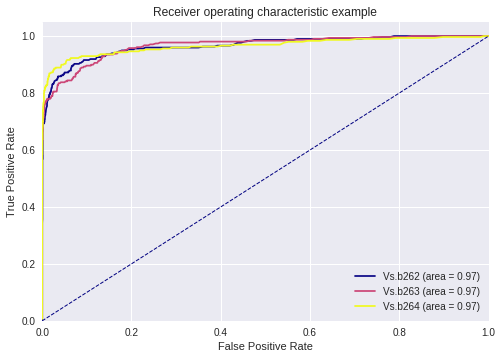

CPU times: user 2min 8s, sys: 193 ms, total: 2min 8s
Wall time: 2min 8s


In [25]:
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), sampler=SMOTE(),
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(rf(["b278", "b261"]))

### 6.4. KNN

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      0.82      0.90      2500
          3       0.38      0.90      0.53       297

avg / total       0.92      0.83      0.86      2797

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.84      0.90      2500
          3       0.40      0.87      0.55       308

avg / total       0.92      0.84      0.86      2808

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.99      0.83      0.90      2500
          3       0.39      0.92      0.55       298

avg / total       0.93      0.84      0.87      2798

--------------------------------------------------------------------------------


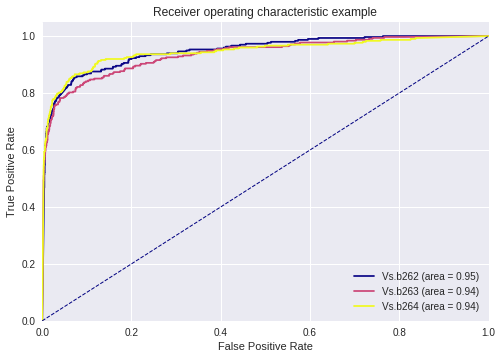

CPU times: user 29 s, sys: 136 ms, total: 29.2 s
Wall time: 29.1 s


In [26]:
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), sampler=SMOTE(),
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(knn(["b278", "b261"]))

In [27]:
%%html
<div style="background-color: #FFFF6F; color:#525200">
    <h2 style="padding: 10px; text-align:center">7. b278+b261+b264 Vs. All </h2>
</div>

### 7.1. SVM - Linear

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.92      0.95      2500
          3       0.57      0.88      0.69       297

avg / total       0.94      0.92      0.92      2797

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.95      0.96      2500
          3       0.67      0.86      0.75       308

avg / total       0.95      0.94      0.94      2808

--------------------------------------------------------------------------------


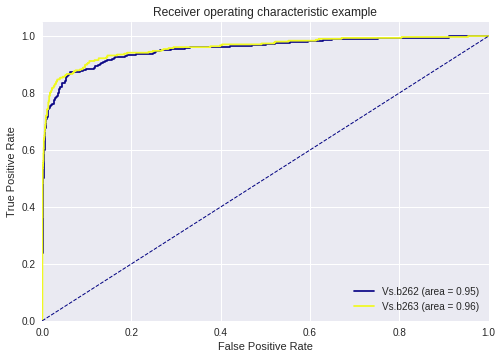

CPU times: user 2min 14s, sys: 1.04 s, total: 2min 15s
Wall time: 2min 15s


In [28]:
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=sclasses, sampler=SMOTE(),
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_linear(["b278", "b261", "b264"]))

### 7.2. SVM - Polynomic

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      2500
          3       0.72      0.77      0.75       297

avg / total       0.95      0.94      0.95      2797

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      2500
          3       0.78      0.78      0.78       308

avg / total       0.95      0.95      0.95      2808

--------------------------------------------------------------------------------


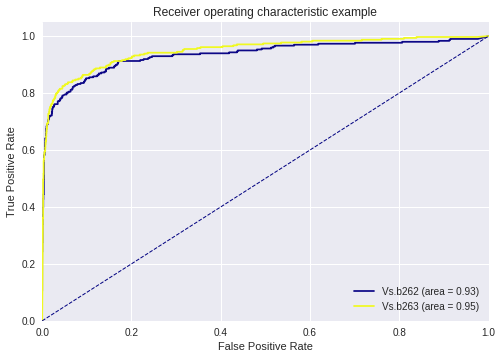

CPU times: user 1min 52s, sys: 1.19 s, total: 1min 53s
Wall time: 1min 53s


In [29]:
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=sclasses, sampler=SMOTE(),
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_poly(["b278", "b261", "b264"]))

### 7.3. Random Forest

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      2500
          3       0.87      0.79      0.83       297

avg / total       0.96      0.97      0.96      2797

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.97      0.98      2500
          3       0.80      0.82      0.81       308

avg / total       0.96      0.96      0.96      2808

--------------------------------------------------------------------------------


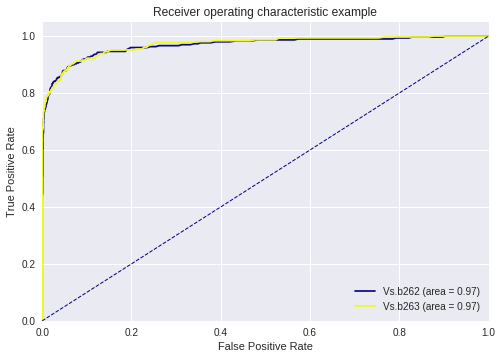

CPU times: user 2min 14s, sys: 220 ms, total: 2min 14s
Wall time: 2min 14s


In [30]:
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), sampler=SMOTE(),
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(rf(["b278", "b261", "b264"]))

### 7.4. KNN

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      0.86      0.92      2500
          3       0.43      0.89      0.58       297

avg / total       0.93      0.86      0.88      2797

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.87      0.92      2500
          3       0.46      0.86      0.60       308

avg / total       0.92      0.87      0.89      2808

--------------------------------------------------------------------------------


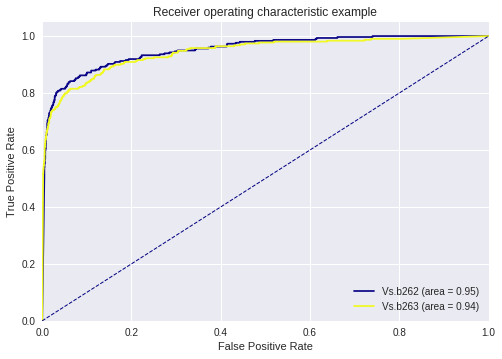

CPU times: user 32.3 s, sys: 104 ms, total: 32.4 s
Wall time: 32.4 s


In [31]:
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), sampler=SMOTE(),
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(knn(["b278", "b261", "b264"]))

In [32]:
print("Total Run Time: " + str(time.time() - start))
del start

Total Run Time: 1317.74270511
